# Aim

Finally design the vibration _controller_ instead of just the observer.

In [1]:
from controller import *
%matplotlib inline

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


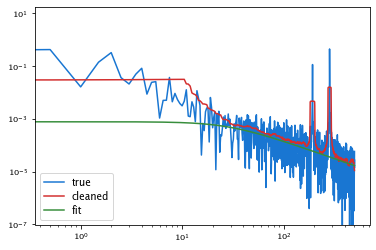

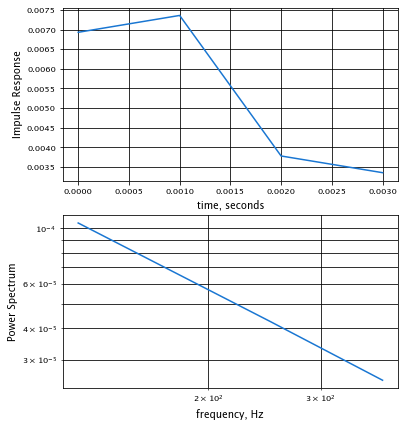

In [10]:
kalman = Controller('kalman', make_kfilter_turb(make_impulse(truth[:size//2], N=N), truth[:N] + np.random.normal(0, noise, (N,))))

In [63]:
run, predict = vibe.kfilter.run(truth + np.random.normal(0, 0.06, truth.size), save_physics=True)

In [68]:
res = truth - predict
rms(res)

0.33035378685322786

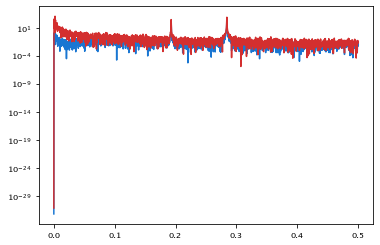

In [69]:
plt.semilogy(*signal.periodogram(res))
plt.semilogy(*signal.periodogram(truth))

In [70]:
res_turb, actions, measurements = kalman.control(res)

Starting at timestep 4


In [71]:
rms(res_turb)

0.4665714178159685

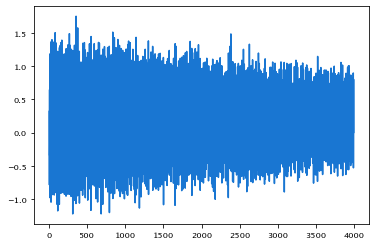

In [59]:
plt.plot(res_turb)

(1e-07, 20.792897309165465)

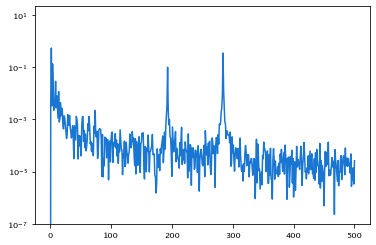

In [60]:
f, psd = signal.periodogram(truth[:1000], fs=f_sampling)
plt.semilogy(f, psd)
plt.ylim(1e-7)

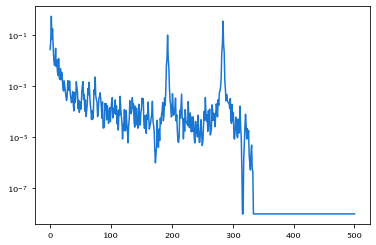

In [4]:
# our goal is to pick off those two peaks in closed loop!

plt.semilogy(f, noise_filter(psd))

In [5]:
params, variances = vibe_fit_freq(noise_filter(psd), N=2)

In [6]:
def error(psd):
    params, _ = vibe_fit_freq(psd, N=2)
    width = 10
    peaks = params[:,0]
    peaks = [int(p) for p in peaks]
    windows = np.zeros(len(peaks))
    for i, peak in enumerate(peaks):
        windows[i] = np.mean(psd[peak-width:peak+width])

    return rms(psd[peaks] - windows) # a metric of how far off you are from closed-loop correction!
    
error(psd)

0.23748719089505146

In [7]:
def run_CL_vibe(start, end):
    def run_with_initialization(start_states):
        for i, state in enumerate(start_states):
            vibe.kfilter.state[2*i] = state
        res, _, _, = vibe.control(truth[start:end])
        
        return res

    def get_err(res):
        _, psd = signal.periodogram(res, fs=f_sampling)
        return error(psd) + rms(res)
        
    return run_with_initialization, get_err
    
runner, error2 = run_CL_vibe(0, 1000)
vibe_states = optimize.minimize(lambda res: error2(runner(res)), [0.05, 0.05])

Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200
Starting at timestep 200


In [8]:
vibe_states

      fun: 8.922995474948682
 hess_inv: array([[ 1.39451247e-09, -1.46554388e-09],
       [-1.46560778e-09,  1.54026051e-09]])
      jac: array([-2757714.66789842, -6438993.08964789])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 131
      nit: 2
     njev: 30
   status: 2
  success: False
        x: array([0.04999999, 0.04999999])

In [9]:
_, psd_res = signal.periodogram(residuals, fs=f_sampling)
plt.semilogy(f, psd_res)
plt.ylim(1e-7)

NameError: name 'residuals' is not defined